In [ ]:
from Bio import SeqIO
from collections import Counter

# Define the sequences around the barcode and expected barcode lengths
before_barcode = "GTCGACCTGCAGCGTACG"
after_barcode = "AGAGACCTCGTGGACATC"
barcode_lengths = [20, 19, 18, 21]

# Function to count barcodes in a single FASTQ file
def count_barcodes_in_fastq(fastq_path, before_barcode, after_barcode, barcode_lengths):
    barcode_counts = Counter()
    for record in SeqIO.parse(fastq_path, "fastq"):
        seq = str(record.seq)
        start_idx = seq.find(before_barcode) + len(before_barcode)
        end_idx = seq.find(after_barcode, start_idx)
        if start_idx != -1 and end_idx != -1:
            barcode = seq[start_idx:end_idx]
            if len(barcode) in barcode_lengths:
                barcode_counts[barcode] += 1
    return barcode_counts

# List of FASTQ file paths
fastq_paths = [
    "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/37A1_S1_L001_R1_001.fastq", 
    "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/37A2_S2_L001_R1_001.fastq", 
    "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/37B1_S3_L001_R1_001.fastq", 
    "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/37B2_S4_L001_R1_001.fastq",
    "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/50A1_S5_L001_R1_001.fastq", 
    "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/50A2_S6_L001_R1_001.fastq", 
    "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/50B1_S7_L001_R1_001.fastq", 
    "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/50B2_S8_L001_R1_001.fastq"

    # Add paths to other FASTQ files as needed
]



# File to save the output
output_file_path = "barcode_counts_output.txt"

# Count barcodes for each FASTQ file and write results to the file
with open(output_file_path, "w") as file:
    for fastq_path in fastq_paths:
        barcode_counts = count_barcodes_in_fastq(fastq_path, before_barcode, after_barcode, barcode_lengths)
        file.write(f"Barcode counts for {fastq_path}:\n")
        for barcode, count in barcode_counts.items():
            file.write(f"{barcode}: {count}\n")
        file.write("\n")

print(f"Barcode counts saved to {output_file_path}")


## to filter barcodes with less than 5 reads off

In [7]:
from Bio import SeqIO
from collections import Counter
import pandas as pd

# Define the sequences around the barcode and expected barcode lengths
before_barcode = "GTCGACCTGCAGCGTACG"
after_barcode = "AGAGACCTCGTGGACATC"
barcode_lengths = [20, 19, 18, 21]

# Function to count barcodes in a single FASTQ file
def count_barcodes_in_fastq(fastq_path, before_barcode, after_barcode, barcode_lengths):
    barcode_counts = Counter()
    for record in SeqIO.parse(fastq_path, "fastq"):
        seq = str(record.seq)
        start_idx = seq.find(before_barcode) + len(before_barcode)
        end_idx = seq.find(after_barcode, start_idx)
        if start_idx != -1 and end_idx != -1:
            barcode = seq[start_idx:end_idx]
            if len(barcode) in barcode_lengths:
                barcode_counts[barcode] += 1
    return barcode_counts

# List of FASTQ file paths
fastq_paths = [
    "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/37A1_S1_L001_R1_001.fastq", 
    "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/37A2_S2_L001_R1_001.fastq", 
    "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/37B1_S3_L001_R1_001.fastq", 
    "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/37B2_S4_L001_R1_001.fastq",
    "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/50A1_S5_L001_R1_001.fastq", 
    "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/50A2_S6_L001_R1_001.fastq", 
    "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/50B1_S7_L001_R1_001.fastq", 
    "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/50B2_S8_L001_R1_001.fastq"
]

# Dictionary to store the counts from each file
all_counts = {}

# Count barcodes for each FASTQ file and store the results in `all_counts`
for fastq_path in fastq_paths:
    barcode_counts = count_barcodes_in_fastq(fastq_path, before_barcode, after_barcode, barcode_lengths)
    # Filter out barcodes with fewer than 5 reads
    filtered_counts = {barcode: count for barcode, count in barcode_counts.items() if count >= 5}
    all_counts[fastq_path] = filtered_counts

# Create a DataFrame to store the barcode counts from each file
df = pd.DataFrame(all_counts).fillna(0)  # Fill missing values with 0 for barcodes not found in a file

# Rename columns for easier interpretation (optional)
df.columns = [f"Counts_{i+1}" for i in range(len(fastq_paths))]

# Save DataFrame to file
output_file_path = "barcode_counts_output.tsv"
df.to_csv(output_file_path, sep="\t")

print(f"Barcode counts saved to {output_file_path}")


Barcode counts saved to barcode_counts_output.tsv


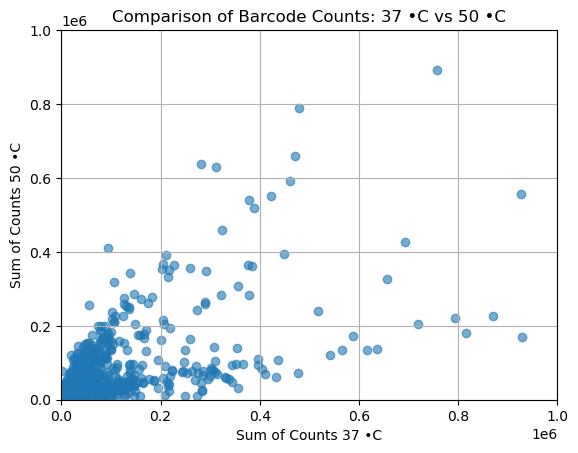

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the TSV file
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Barseq_counting_without_Tnseq/barcode_counts_output.tsv"  # Replace with your actual path
df = pd.read_csv(file_path, sep="\t")

# Calculate the sum of Counts_1 to Counts_4 and Counts_5 to Counts_8
df['Sum_A'] = df[['Counts_1', 'Counts_2', 'Counts_3', 'Counts_4']].sum(axis=1)
df['Sum_B'] = df[['Counts_5', 'Counts_6', 'Counts_7', 'Counts_8']].sum(axis=1)

# Create a scatter plot for Sum_A vs Sum_B
plt.scatter(df['Sum_A'], df['Sum_B'], alpha=0.6)
plt.xlabel("Sum of Counts 37 •C")
plt.ylabel("Sum of Counts 50 •C")
plt.title("Comparison of Barcode Counts: 37 •C vs 50 •C")
plt.xlim(0, 1000000)  # Adjust the range for the x-axis
plt.ylim(0, 1000000)  # Adjust the range for the y-axis
plt.grid(True)
plt.show()


### to filter single column reads off

In [20]:
import pandas as pd

# Load the TSV file
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Barseq_counting_without_Tnseq/barcode_counts_output.tsv"  # Replace with your actual file path
df = pd.read_csv(file_path, sep="\t")

# Remove decimal points by converting values to integers
df.iloc[:, 1:] = df.iloc[:, 1:].astype("Int64")

# Filter rows where the count appears only in one column (only one non-zero count)
single_column_barcodes = df[(df.iloc[:, 1:] != 0).sum(axis=1) == 1]
filtered_df = df[(df.iloc[:, 1:] != 0).sum(axis=1) > 1]

# Save the filtered DataFrames to separate files
filtered_output_path = "barcode_counts_filtered_output.tsv"
single_column_output_path = "barcode_counts_single_column_output.tsv"
filtered_df.to_csv(filtered_output_path, sep="\t", index=False)
single_column_barcodes.to_csv(single_column_output_path, sep="\t", index=False)

print("Files saved as:")
print(f"Filtered counts with multiple column values: {filtered_output_path}")
print(f"Barcodes with values in only one column: {single_column_output_path}")


Files saved as:
Filtered counts with multiple column values: barcode_counts_filtered_output.tsv
Barcodes with values in only one column: barcode_counts_single_column_output.tsv


## To filter out rows where all values across the columns are less than 10

In [27]:
import pandas as pd

# Load the filtered TSV file
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Barseq_counting_without_Tnseq/barcode_counts_filtered_output.tsv"  # Replace with the actual path
df = pd.read_csv(file_path, sep="\t")

# Filter out rows where all values across specified columns are less than 10 or change accordingly
df_filtered = df[(df.iloc[:, 1:] >= 100).any(axis=1)]

# Save the resulting DataFrame to a new file
output_path = "barcode_counts_filtered_above_100.tsv"
df_filtered.to_csv(output_path, sep="\t", index=False)

print(f"Filtered data saved to {output_path}")


Filtered data saved to barcode_counts_filtered_above_100.tsv


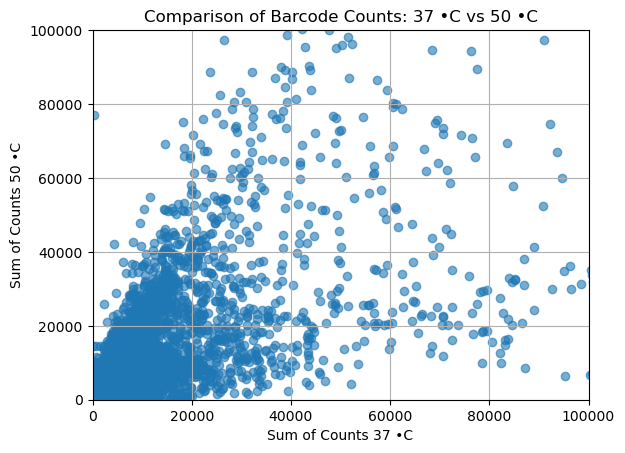

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the TSV file
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Barseq_counting_without_Tnseq/barcode_counts_filtered_above_50.tsv"  # Replace with your actual path
df = pd.read_csv(file_path, sep="\t")

# Calculate the sum of Counts_1 to Counts_4 and Counts_5 to Counts_8
df['Sum_A'] = df[['Counts_1', 'Counts_2', 'Counts_3', 'Counts_4']].sum(axis=1)
df['Sum_B'] = df[['Counts_5', 'Counts_6', 'Counts_7', 'Counts_8']].sum(axis=1)

# Create a scatter plot for Sum_A vs Sum_B
plt.scatter(df['Sum_A'], df['Sum_B'], alpha=0.6)
plt.xlabel("Sum of Counts 37 •C")
plt.ylabel("Sum of Counts 50 •C")
plt.title("Comparison of Barcode Counts: 37 •C vs 50 •C")
plt.xlim(0, 100000)  # Adjust the range for the x-axis
plt.ylim(0, 100000)  # Adjust the range for the y-axis
plt.grid(True)
plt.show()


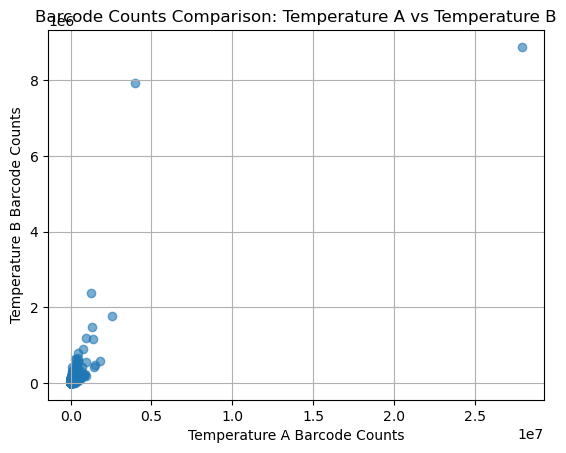

In [3]:
from Bio import SeqIO
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Define sequences for locating barcodes and expected barcode lengths
before_barcode = "GTCGACCTGCAGCGTACG"
after_barcode = "AGAGACCTCGTGGACATC"
barcode_lengths = [20, 19, 18, 21]

# Function to count barcodes in a given FASTQ file
def count_barcodes_in_fastq(fastq_path, before_barcode, after_barcode, barcode_lengths):
    barcode_counts = Counter()
    for record in SeqIO.parse(fastq_path, "fastq"):
        seq = str(record.seq)
        start_idx = seq.find(before_barcode) + len(before_barcode)
        end_idx = seq.find(after_barcode, start_idx)
        if start_idx != -1 and end_idx != -1:
            barcode = seq[start_idx:end_idx]
            if len(barcode) in barcode_lengths:
                barcode_counts[barcode] += 1
    return barcode_counts

# Paths to the FASTQ files for each temperature
temp_37C_files = ["/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/37A1_S1_L001_R1_001.fastq", "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/37A2_S2_L001_R1_001.fastq", "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/37B1_S3_L001_R1_001.fastq", "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/37B2_S4_L001_R1_001.fastq"]
temp_50C_files = ["/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/50A1_S5_L001_R1_001.fastq", "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/50A2_S6_L001_R1_001.fastq", "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/50B1_S7_L001_R1_001.fastq", "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/BarSeq_FASTQs_13k_mutants_03_27_2024/Barseq_37•C_vs_50•C_500_million_reads/50B2_S8_L001_R1_001.fastq"]

# Count barcodes across all files for each temperature
barcode_counts_A = Counter()
barcode_counts_B = Counter()

for file in temp_37C_files:
    barcode_counts_A.update(count_barcodes_in_fastq(file, before_barcode, after_barcode, barcode_lengths))

for file in temp_50C_files:
    barcode_counts_B.update(count_barcodes_in_fastq(file, before_barcode, after_barcode, barcode_lengths))

# Combine barcode counts for analysis
barcodes = set(barcode_counts_A.keys()).union(set(barcode_counts_B.keys()))
data = {
    "barcode": list(barcodes),
    "count_A": [barcode_counts_A[barcode] for barcode in barcodes],
    "count_B": [barcode_counts_B[barcode] for barcode in barcodes]
}
df = pd.DataFrame(data)

# Scatter plot of barcode counts at Temperature A vs Temperature B
plt.scatter(df["count_A"], df["count_B"], alpha=0.6)
plt.xlabel("Temperature A Barcode Counts")
plt.ylabel("Temperature B Barcode Counts")
plt.title("Barcode Counts Comparison: Temperature A vs Temperature B")
plt.grid(True)
plt.show()
